# Intro

This note book is for demo test.  
We have taken a survey for demo dataset before.  
Now, using this data, we are going to predict the 'dec_o'

# Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv("../data/Speed Dating Data.csv")
df_data.shape

(8378, 195)

# Data preprocessing

## Make dataframe

In [2]:
# drop missing values.
cols = ['iid', 'pid', 'match','gender','dec', 'age',
        'attr1_1', 'sinc1_1', 'fun1_1', 'intel1_1', 'amb1_1',
        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']

row_full = df_data.shape[0]
df_selected = df_data.loc[:, cols]
df_selected.dropna(inplace=True)
row_drop = df_selected.shape[0]

miss_rate = (row_full - row_drop) / row_full
print("missing rate :", miss_rate)

missing rate : 0.0185008355216042


In [3]:
# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 1 ]
df_female = df_selected.loc[ df_selected['gender'] == 0 ]

# Then, Let's make dropped duplicates dataframe of male.
df_male_drop = df_male.drop_duplicates(subset=['iid'])
df_female_drop = df_female.drop_duplicates(subset=['iid'])

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + 
                        ['dec_o', 'age_o', 
                         'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o', 
                         'attr3_1_o','sinc3_1_o','fun3_1_o', 'intel3_1_o','amb3_1_o'] )
index = 0

print("dataframe is been making...")
# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    
    # Find pid row in female_drop dataframe.
    pid = m_row['pid']
    f_row = df_female_drop.loc[ df_female_drop['iid'] == pid ]
    
    if f_row.empty :
        continue
    
    f_row = f_row.iloc[0]
    
    # Extract values from each row of dataframe.
    values = list(m_row.values) + list(f_row['dec':'amb3_1'].values)
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

# Let's fill each rows of dataframe for matching.
for fm_index, fm_row in df_female.iterrows() :
    
    # Find pid row in male_drop dataframe.
    pid = fm_row['pid']
    m_row = df_male_drop.loc[ df_male_drop['iid'] == pid ]
    
    if m_row.empty :
        continue
    
    m_row = m_row.iloc[0]
    
    # Extract values from each row of dataframes.
    values = list(fm_row.values) + list(m_row['dec':'amb3_1'].values)
    
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

print() 
print("making success.\n")            
print("df_match shape : ", df_match.shape)
df_match.head()

dataframe is been making...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
making success.

df_match shape :  (8078, 28)


,iid,pid,match,gender,dec,age,attr1_1,sinc1_1,fun1_1,intel1_1,...,attr1_1_o,sinc1_1_o,fun1_1_o,intel1_1_o,amb1_1_o,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o
0,11.0,1.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,15.0,20.0,15.0,20.0,15.0,6.0,8.0,8.0,8.0,7.0
1,11.0,2.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,45.0,5.0,20.0,25.0,0.0,7.0,5.0,10.0,8.0,3.0
2,11.0,3.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,35.0,10.0,10.0,35.0,10.0,8.0,9.0,8.0,9.0,8.0
3,11.0,4.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,8.0
4,11.0,5.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,5.0,25.0,25.0,10.0,6.0,3.0,6.0,10.0,8.0


# Separation and learning

## Features selection

In [4]:
X = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
   'attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o',
   'age','age_o'
  ]
Y = ['dec_o']

## Data separation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

train, test = train_test_split(df_match, test_size=0.25,random_state=0)

train_X = train[X]
train_Y = train[Y]

test_X = test[X]
test_Y = test[Y]
 
features_one = train_X.values
target = train_Y.values

print("train shape : ", train_X.shape)
print("test shape : ", test_X.shape)

train shape :  (6058, 12)
test shape :  (2020, 12)


## Learning

### Random Forest

C:\Users\Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The accuracy of the Decision Tree is 0.9405940594059405
AUC in ROC curve is 0.9249133858267716


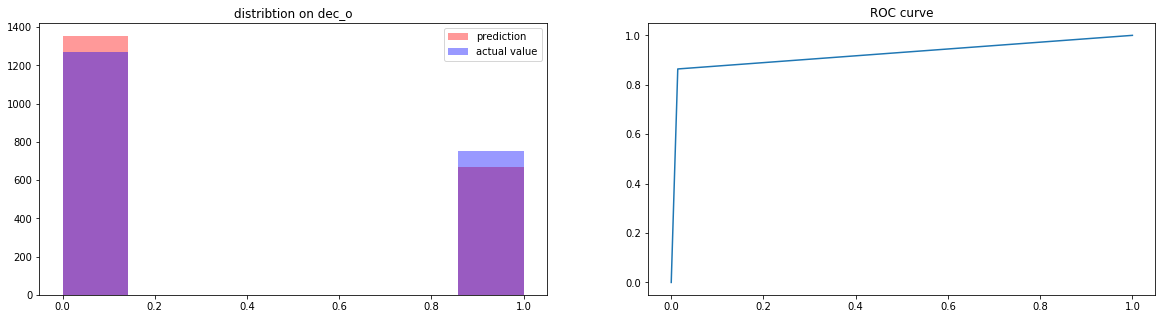

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(features_one, target)
dt_prediction = clf.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
print('The accuracy of the Decision Tree is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, dt_prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(dt_prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, dt_prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show() 

# Demo Test

Let's make dataframe for demo and test.

### data import

In [9]:
df_demo = pd.read_csv("../data/Speed Dating Survey.csv")
print(df_demo.shape)
df_demo.head()

(15, 22)


,?TIMESTAMP,name,sex,age,How frequently do you go on dates?,How often do you go out (not necessarily on dates)?,Attractive1,Sincere1,Intelligent1,Fun1,...,Attractive5,Sincere5,Intelligent5,Fun5,Ambitious5,Attractive3,Sincere3,Intelligent3,Fun3,Ambitious3
0,2018-07-18 2:59,한규수,남자,26,6,1,8,9,8,6,...,8,9,8,6,7,8,7,7,6,8
1,2018-07-18 3:01,홍진,여자,22,1,1,10,7,3,10,...,8,4,9,7,6,9,5,9,8,7
2,2018-07-18 3:02,심지선,여자,24,7,2,7,8,5,9,...,5,6,5,4,3,6,8,5,5,6
3,2018-07-18 3:04,권도경,여자,23,1,3,3,4,1,9,...,5,1,1,7,2,5,10,5,10,1
4,2018-07-18 3:10,박승우,남자,26,2,1,7,8,6,6,...,6,7,7,7,7,7,9,7,7,6


In [9]:
df_demo.columns.values

array(['?TIMESTAMP', 'name', 'sex', 'age',
       'How frequently do you go on dates? ',
       'How often do you go out (not necessarily on dates)?',
       'Attractive1', 'Sincere1', 'Intelligent1', 'Fun1', 'Ambitious1',
       'Shared1', 'Attractive5', 'Sincere5', 'Intelligent5', 'Fun5',
       'Ambitious5', 'Attractive3', 'Sincere3', 'Intelligent3', 'Fun3',
       'Ambitious3'], dtype=object)

### data preprocessing

In [10]:
# Firstly, Let's rename of each columns.
df_demo.rename(
    columns = {
        'How frequently do you go on dates? ' : 'date',
        'How often do you go out (not necessarily on dates)?' : 'go_out',
        # about attrX_1 : 
        'Attractive1' : 'attr1_1',
        'Sincere1' : 'sinc1_1',
        'Intelligent1' : 'intel1_1',
        'Fun1' : 'fun1_1',
        'Ambitious1' : 'amb1_1',
        'Shared1' : 'shar1_1',

        # about attrX_3
        'Attractive3' : 'attr3_1',
        'Sincere3' : 'sinc3_1',
        'Intelligent3' : 'intel3_1',
        'Fun3' : 'fun3_1',
        'Ambitious3' : 'amb3_1',

        # about attrX_5
        'Attractive5' : 'attr5_1',
        'Sincere5' : 'sinc5_1',
        'Intelligent5' : 'intel5_1',
        'Fun5' : 'fun5_1',
        'Ambitious5' : 'amb5_1'
}, inplace=True, )

# df_demo = df_demo = 
df_male_demo = df_demo[df_demo['sex'] == '남자']
df_female_demo = df_demo[df_demo['sex'] == '여자']

In [12]:
# Let's choose a participant who is iid is 0. She is a female participant.
# participant = df_female_demo.iloc[5]
participant = df_male_demo.iloc[7]

print( participant.loc['name'] )

# Extract only features we need.
cols = ['age', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']
participant = participant.loc[cols]
participant_values = list( participant.values )

# Let's make dataframe for the participant. (empty yet)
df_input = pd.DataFrame( data = None, columns = cols + ['age_o', 'attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o'] )
index = 0

# Let's fill each rows of dataframe.
print("making ...")

for m_index, m_row in df_female_demo.iterrows() :
    values = participant_values + list(m_row.loc[cols].values)
            
    df_input.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")
print()
print("success.\n")

# We need to fix above dataframe for order of X.
X = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
   'attr3_1_o', 'sinc3_1_o', 'fun3_1_o', 'intel3_1_o',  'amb3_1_o',
   'age','age_o'
  ]
df_input = df_input[X]

print(df_input.shape)
df_input.head()

이태승
making ...

success.

(6, 12)


,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o,age,age_o
0,3,9,6,1,9,9,5,8,9,7,24,22
1,3,9,6,1,9,6,8,5,5,6,24,24
2,3,9,6,1,9,5,10,10,5,1,24,23
3,3,9,6,1,9,9,7,6,8,5,24,22
4,3,9,6,1,9,8,8,8,8,8,24,22


Next, Let's input above dataframe into our model.

In [13]:
# Input dataframe into our model.
prediction = clf.predict_proba(df_input)

# Let's make result dataframe and add column including 'prediction'
dec_prediciton = []
for i in prediction :
    dec_prediciton.append(i[1])
cols = ['name', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']
df_result = df_female_demo.loc[:, cols]
df_result['dec_prediction'] = dec_prediciton

# Sort by prediction value.
df_result.sort_values(by = ['dec_prediction'], inplace = True, ascending= False )
df_result

,name,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec_prediction
9,맹채정,8,8,8,8,8,0.8
5,윤선희,9,7,6,8,5,0.5
14,이수연,7,10,5,10,10,0.5
1,홍진,9,5,8,9,7,0.4
3,권도경,5,10,10,5,1,0.3
2,심지선,6,8,5,5,6,0.1
